In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
%pylab inline
import matplotlib.pyplot as pltplt
pltplt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Carregando Data Set vendas de games 2017
df= pd.read_csv('./DataSet/Video_Game_Sales_as_of_Jan_2017.csv')
data= df.copy()

# Perguntas a serem respondidas

1º Quantidade de jogos por Plataforma
2º Quantidade de Usuários por Gênero
3º Quantidade de Usuários por Plataforma
4º Diferenças de Vendas entre as PLATAFORMAS  Vendas Globais



# Limpesa dos dados - Data Cleaning


In [3]:
# visualizando s colunas para renomea-las
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating'],
      dtype='object')

In [4]:
'''
utilizando o método rename com o paramentro columns passando um dicianario contendo a chave(nome da coluna existente)
e o value(passando o nome da coluna para renomear)
'''
data.rename(columns={'Name':'NOME',
                    'Platform':'PLATAFORMA',
                    'Year_of_Release':'ANO DE LANÇAMENTO',
                    'Genre':'GÊNERO',
                    'Publisher':'PUBLICAÇÃO',
                    'NA_Sales':'VENDAS NA',
                    'EU_Sales':'VENDAS EU',
                    'JP_Sales':'VENDAS JP',
                    'Other_Sales':'OUTRAS VENDAS',
                    'Global_Sales':'VENDAS GLOBAIS',
                    'Critic_Score':'PONTUAÇÃO CRÍTICA',
                    'Critic_Count':'CONTAGEM CRÍTICA',
                    'User_Score':'PONTUAÇÃO USUÁRIO',
                    'User_Count':'CONTAGEM USUÁRIO',
                    'Rating':'AVALIAÇÃO'}, inplace=True)

In [5]:
data.dtypes

NOME                  object
PLATAFORMA            object
ANO DE LANÇAMENTO    float64
GÊNERO                object
PUBLICAÇÃO            object
VENDAS NA            float64
VENDAS EU            float64
VENDAS JP            float64
OUTRAS VENDAS        float64
VENDAS GLOBAIS       float64
PONTUAÇÃO CRÍTICA    float64
CONTAGEM CRÍTICA     float64
PONTUAÇÃO USUÁRIO    float64
CONTAGEM USUÁRIO     float64
AVALIAÇÃO             object
dtype: object

In [6]:
data.isnull().sum()

NOME                    0
PLATAFORMA              0
ANO DE LANÇAMENTO       8
GÊNERO                  0
PUBLICAÇÃO              1
VENDAS NA               0
VENDAS EU               0
VENDAS JP               0
OUTRAS VENDAS           0
VENDAS GLOBAIS          0
PONTUAÇÃO CRÍTICA    9080
CONTAGEM CRÍTICA     9080
PONTUAÇÃO USUÁRIO    9618
CONTAGEM USUÁRIO     9618
AVALIAÇÃO            7164
dtype: int64


Ultilizando o método isnull() obtemos no dataFrame valores com a notação NaN. Ou seja 
Nulo e um somatório sum() que trará como resultado em cada coluna o somatório dos dados faltantes
Note que na pontuação critica ,contagem critica, contagem usuário e avaliação , temos uma quantidade alta de valores faltates. 
E se deixarmos assim teremos análises um pouca estranhas na faze de exploração. 

Utilizaremos o metodo fillna() e preencheremos os campos NaN com a média dos valores presentes. Mas antes verificaremos se existem outliers que são valores que fojem do padrão de outros dados. Ou seja um valor discrepante. 
Para isso valor plotar um gráfico boxplot que nos ajudará a encontrar esses outliers. 
Esses gráficos serão plotados nas seguintes colunas PONTUAÇÃO CRÍTICA ,CONTAGEM CRÍTICA , PONTUAÇÃO USUÁRIO, CONTAGEM USUÁRIO



AxesSubplot(0.125,0.125;0.775x0.755)


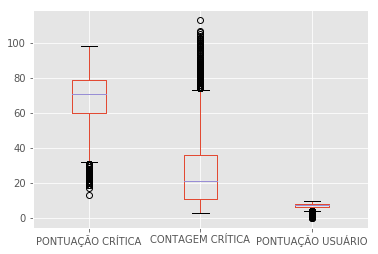

In [7]:
##outliers_pontuacao_critica= data['PONTUAÇÃO CRÍTICA'].isnull()
##boxplot_pontuacao_critica = data.boxplot(by='outliers_pontuacao_critica')
print(data.boxplot(column=['PONTUAÇÃO CRÍTICA','CONTAGEM CRÍTICA','PONTUAÇÃO USUÁRIO']))



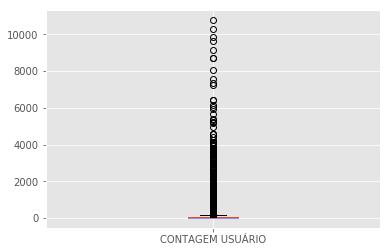

In [111]:

data.boxplot(column='CONTAGEM USUÁRIO')

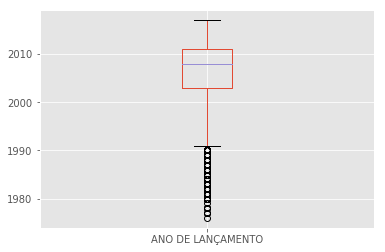

In [10]:
data.boxplot(column='ANO DE LANÇAMENTO')

Gerado os gráficos, notamos que na coluna PONTUAÇÃO CRÍTICA  temos um outliers encontrado abaixo na concentração de valores mínimos. Na coluna CONTAGEM CRÍTICA  encontramos um outliers acima da concentração de valores maximos. Na coluna PONTUAÇÃO USUÁRIO temos uma distribuição OK concentrado por valores mínimos. Porem sem outliers. Na coluna CONTAGEM USUÁRIO temos uma concentração de valores máximos. Poem temos muitos outliers. E por ultima coluna ANO DE LANÇAMENTO, concentrado por valores mínimos. Porem com outliers

agora iremos buscar esses outliers em cada coluna para sabermos o valor do mesmo. 

In [8]:

print('Menor valor na coluna PONTUAÇÃO CRÍTICA => '+str(data['PONTUAÇÃO CRÍTICA'].min()))
print('Maior valor na coluna CONTAGEM CRÍTICA =>'+str(data['CONTAGEM CRÍTICA'].max()))
print('Maior valor na coluna CONTAGEM USUÁRIO =>'+str(data['CONTAGEM USUÁRIO'].max()))

Menor valor na coluna PONTUAÇÃO CRÍTICA => 13.0
Maior valor na coluna CONTAGEM CRÍTICA =>113.0
Maior valor na coluna CONTAGEM USUÁRIO =>10766.0


Para preechermos os valores faltates iremos fazer de duas formas:
1º fillna() usando a média para colunas que não possuem outliers 
2º fillna() usando a mediana para colunas que possuem outliers.

Antes iremos dropar a linha de publicação que tem 1 dado faltante. E preecheremos os 8 campos NaN com a média da coluna ANO LANÇAMENTO

In [9]:
#data.drop(subset='PUBLICAÇÃO', axis=1, inplace=True)
# Lembrando as colunas PONTUAÇÃO CRÍTICA, CONTAGEM CRÍTICA , CONTAGEM USUÁRIO, possuem outliers. Logo será preenchido com a mediana
# A coluna PONTUAÇÃO USUÁRIO e  ANO DE LANÇAMENTO ,possui outliers então será preencida pela median.

data['PONTUAÇÃO CRÍTICA'].fillna(data['PONTUAÇÃO CRÍTICA'].median(), inplace=True)
data['CONTAGEM USUÁRIO'].fillna(data['CONTAGEM USUÁRIO'].median(), inplace=True)
data['CONTAGEM CRÍTICA'].fillna(data['CONTAGEM CRÍTICA'].median(), inplace=True)
data['PONTUAÇÃO USUÁRIO'].fillna(data['PONTUAÇÃO USUÁRIO'].mean(), inplace=True)
data["ANO DE LANÇAMENTO"].fillna(data["ANO DE LANÇAMENTO"].median(),inplace = True)


In [5]:
data.isnull().sum()

NOME                    0
PLATAFORMA              0
ANO DE LANÇAMENTO       0
GÊNERO                  0
PUBLICAÇÃO              1
VENDAS NA               0
VENDAS EU               0
VENDAS JP               0
OUTRAS VENDAS           0
VENDAS GLOBAIS          0
PONTUAÇÃO CRÍTICA       0
CONTAGEM CRÍTICA        0
PONTUAÇÃO USUÁRIO       0
CONTAGEM USUÁRIO        0
AVALIAÇÃO            7164
dtype: int64

Agora que resolvemos os valores faltantes das colunas processadas acima, iremos focar em duas colunas: PUBLICAÇÃO e AVALIAÇÃO.


Na coluna PUBLICAÇÃO temos a empresa responsável pela publicação do produto. Ou seja o jogo.
E na coluna AVALIAÇÃO temos algumas indicações E,M,T  que são classificações da ESRB Ratings Guide(Entertainment Software Rating Board).

Fornecem informações concisas e objetivas sobre o conteúdo em jogos e aplicativos de vídeo, para que os consumidores, especialmente os pais, possam fazer escolhas informadas. As classificações do ESRB têm três partes:

=====>Categorias de avaliação- Sugerem adequação à idade

=====>Os Descritores de Conteúdo- Indicam conteúdo que pode ter acionado uma classificação específica  pode ser de interesse ou preocupação

======>Elementos- Interativos destacam recursos interativos ou on-line de um produto, incluindo a capacidade de interação dos usuários, o compartilhamento da localização dos usuários com outros usuários, compras de produtos ou serviços digitais pode acesso irrestrito à Internet .


Aqui uma ilustração Sobre as classificação

![Image of Yaktocat](https://esrbstorage.blob.core.windows.net/esrbcontent/images/esrb_rating_categories_e-ao.png)

![Image of Yaktocat](https://esrbstorage.blob.core.windows.net/esrbcontent/images/ratingsymbol_rp.png)


Essa classificação RP(Clasificação pendente)seguinifica que  ainda não foi atribuída uma classificação final do ESRB.Ela  aparece apenas em publicidade, marketing e materiais promocionais relacionados a um videogame físico (por exemplo, em caixa) que deve ter uma classificação ESRB e deve ser substituído pela classificação de um jogo depois de atribuído. E no nosso DataSet, temos alguns valores NaN. Pode ser que esses produtos não receberam essa classificação e estar categorizado como RP ou de fato houveram problemas na coleta dos dados.

Focaremos na coluna AVALIAÇÃO. 

In [13]:
data[data['AVALIAÇÃO'].isnull()].head()

,NOME,PLATAFORMA,ANO DE LANÇAMENTO,GÊNERO,PUBLICAÇÃO,VENDAS NA,VENDAS EU,VENDAS JP,OUTRAS VENDAS,VENDAS GLOBAIS,PONTUAÇÃO CRÍTICA,CONTAGEM CRÍTICA,PONTUAÇÃO USUÁRIO,CONTAGEM USUÁRIO,AVALIAÇÃO
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,21.0,7.117056,25.0,NaN
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,21.0,7.117056,25.0,NaN
5,Tetris,G,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,71.0,21.0,7.117056,25.0,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,71.0,21.0,7.117056,25.0,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,71.0,21.0,7.117056,25.0,NaN


Como nosso dataSet é de vendas, significa que todos os games listados de fato foram lançados. Então podemos descartar o RP como um possível substituto para os nossos NaN.
Podemos podemos deletar esses campo em NaN


In [34]:
data.dropna( inplace=True)



Usando o comando dropna, ele ira deletar todos os valores faltantes , inclusive da PUBLICAÇÃO que tinha 1 dado faltante
feito isso valos salvar esse dataSet modificado. usando o comando to_csv() 
Para o processo de exploração, usaremos o arquivo recentemente salvado Vendas_Games_2017.csv.

In [10]:
data.to_csv('Vendas_Games_2017.csv')


In [11]:
#Carregando o novo Data Set
df=pd.read_csv('Vendas_Games_2017.csv')

# Exploração do Dados 

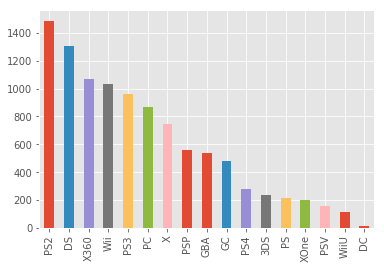

In [5]:
# Respondendo a 1º pergunta: Quantidade de jogos por Plataforma


df['PLATAFORMA'].value_counts().plot(kind='bar')

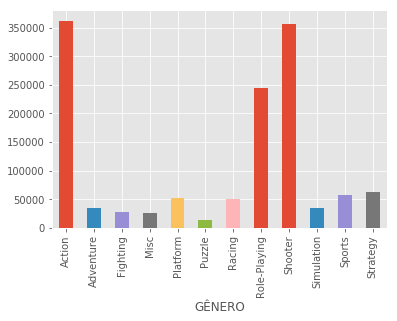

In [3]:
# Respondendo a 2º Quantidade de Usuários por Gênero

df.groupby('GÊNERO')['CONTAGEM USUÁRIO'].sum().plot(kind='bar')

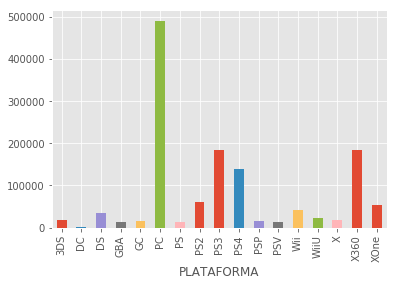

In [5]:
# Respondendo a 3º Quantidade de Usuários por Plataforma

df.groupby('PLATAFORMA')['CONTAGEM USUÁRIO'].sum().plot(kind='bar')


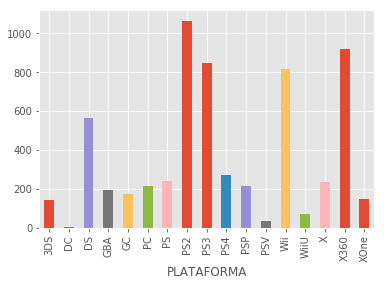

In [8]:
# Respondendo a 4º Diferenças de Vendas entre as PLATAFORMAS  Vendas Globais


df.groupby('PLATAFORMA')['VENDAS GLOBAIS'].sum().plot(kind='bar')


Referências :
__[Blog Minerando Dados](http://minerandodados.com.br/)__
__[ESRB_Ratings_Guide](https://www.ign.com/wikis/content-ratings/ESRB#ESRB_Ratings_Guide)__
